# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
df=sinasc_raw

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
df1 = df[['munResLat', 'IDADEMAE', 'IDADEPAI']]
df1.head()

,munResLat,IDADEMAE,IDADEPAI
0,-11.93554,19,26.0
1,-11.93554,29,24.0
2,-11.93554,37,32.0
3,-12.13178,30,24.0
4,-11.93554,30,27.0


In [6]:
df1['munResLat'].value_counts()

-8.76889     8437
-10.88205    2182
-9.90846     1729
-12.74137    1590
-11.43387    1374
-11.72226     927
-10.43595     881
-10.77388     781
-10.72357     631
-11.67754     616
-10.20981     583
-9.42556      500
-11.52855     450
-10.41177     432
-11.93554     367
-11.69949     353
-8.78502      337
-11.17321     304
-12.06380     303
-11.72133     261
-13.19503     237
-12.43601     233
-9.71667      226
-13.13056     214
-11.34413     205
-9.37819      205
-10.26310     199
-11.12855     170
-11.76712     168
-10.56842     166
-11.04561     164
-12.55684     162
-12.13178     154
-12.99752     127
-10.61207     112
-9.19187      109
-10.91553     104
-11.90842      99
-11.70974      98
-10.24873      97
-9.85139       93
-11.19624      84
-10.43105      81
-13.49976      80
-10.33887      75
-10.93217      64
-11.91439      54
-9.70554       50
-12.17983      44
-11.82571      43
-13.47656      40
-11.42684      32
Name: munResLat, dtype: int64

In [7]:
faixa_latitude = {-8.76889 : "abaixo de -10,5",
-10.88205 : "acima de -10,5",
-9.90846 : "abaixo de -10,5",
-12.74137 : "acima de -10,5",
-11.43387 : "acima de -10,5",
-11.72226 : "acima de -10,5",
-10.43595 : "acima de -10,5",
-10.77388 : "acima de -10,5",
-10.72357 : "acima de -10,5",
-11.67754 : "acima de -10,5",
-10.20981 : "abaixo de -10,5",
-9.42556 : "abaixo de -10,5",
-11.52855 : "acima de -10,5",
-10.41177 : "abaixo de -10,5",
-11.93554 : "acima de -10,5",
-11.69949 : "acima de -10,5",
-8.78502 : "abaixo de -10,5",
-11.17321 : "acima de -10,5",
-12.06380 : "acima de -10,5",
-11.72133 : "acima de -10,5",
-13.19503 : "acima de -10,5",
-12.43601 : "acima de -10,5",
-9.71667 : "abaixo de -10,5",
-13.13056 : "acima de -10,5",
-11.34413 : "acima de -10,5",
-9.37819 : "abaixo de -10,5",
-10.26310 : "abaixo de -10,5",
-11.12855 : "acima de -10,5",
-11.76712 : "acima de -10,5",
-10.56842 : "acima de -10,5",
-11.04561 : "acima de -10,5",
-12.55684 : "acima de -10,5",
-12.13178 : "acima de -10,5",
-12.99752 : "acima de -10,5",
-10.61207 : "acima de -10,5",
-9.19187 : "abaixo de -10,5",
-10.91553 : "acima de -10,5",
-11.90842 : "acima de -10,5",
-11.70974 : "acima de -10,5",
-10.24873 : "abaixo de -10,5",
-9.85139 : "abaixo de -10,5",
-11.19624 : "acima de -10,5",
-10.43105 : "abaixo de -10,5",
-13.49976 : "acima de -10,5",
-10.33887 : "abaixo de -10,5",
-10.93217 : "acima de -10,5",
-11.91439 : "acima de -10,5",
-9.70554 : "abaixo de -10,5",
-12.17983 : "acima de -10,5",
-11.82571 : "acima de -10,5",
-13.47656 : "acima de -10,5",
-11.42684 : "acima de -10,5"}

In [8]:
df1 = df1.set_index('munResLat',
             drop = False)


In [9]:
df1.groupby(faixa_latitude)['IDADEMAE', 'IDADEPAI'].agg(['sum','mean', 'min', 'max', 'median',
    'std', 'var'])

/tmp/ipykernel_5117/262770464.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(faixa_latitude)['IDADEMAE', 'IDADEPAI'].agg(['sum','mean', 'min', 'max', 'median',


IDADEMAE                                                 \
                     sum       mean min max median       std        var   
munResLat                                                                 
abaixo de -10,5   342203  26.017106  11  52   25.0  6.465771  41.806201   
acima de -10,5    363034  26.166498  12  53   26.0  6.311180  39.830995   

                 IDADEPAI                                                     
                      sum       mean   min   max median       std        var  
munResLat                                                                     
abaixo de -10,5   33466.0  32.117083  16.0  73.0   32.0  8.103777  65.671197  
acima de -10,5   203032.0  30.931140  15.0  86.0   30.0  7.704971  59.366582

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
df2= df[['munResArea', 'QTDFILVIVO', 'QTDFILMORT']]

In [11]:
df2['munResArea'].value_counts()

34096.394    8437
6896.648     2182
4426.571     1729
11518.915    1590
3792.998     1374
1457.888      927
2944.128      881
24855.724     781
1969.850      631
6240.932      616
3265.809      583
8509.270      500
4518.035      450
10071.643     432
7067.025      367
7460.219      353
6843.868      337
1758.465      304
10959.767     303
1703.008      261
2783.300      237
4987.177      233
2651.822      226
1451.060      214
3029.189      205
3863.943      205
1931.378      199
831.857       170
3773.505      168
3442.005      166
1191.875      164
5126.723      162
3958.273      154
3060.321      127
5067.384      112
4081.583      109
807.126       104
1197.796       99
843.446        98
2197.413       97
3135.106       93
798.083        84
965.676        81
1314.352       80
1961.778       75
459.978        64
541.647        54
1717.640       50
2548.683       44
605.692        43
6014.733       40
892.842        32
Name: munResArea, dtype: int64

In [12]:
area={34096.394: "acima de 3.000",
6896.648: "acima de 3.000",
4426.571: "acima de 3.000",
11518.915: "acima de 3.000",
3792.998: "acima de 3.000",
1457.888: "abaixo de 3.000",
2944.128: "abaixo de 3.000",
24855.724: "acima de 3.000",
1969.850: "abaixo de 3.000",
6240.932: "acima de 3.000",
3265.809: "acima de 3.000",
8509.270: "acima de 3.000",
4518.035: "acima de 3.000",
10071.643: "acima de 3.000",
7067.025: "acima de 3.000",
7460.219: "acima de 3.000",
6843.868: "acima de 3.000",
1758.465: "abaixo de 3.000",
10959.767: "acima de 3.000",
1703.008: "abaixo de 3.000",
2783.300: "abaixo de 3.000",
4987.177: "acima de 3.000",
2651.822: "abaixo de 3.000",
1451.060: "abaixo de 3.000",
3029.189: "acima de 3.000",
3863.943: "acima de 3.000",
1931.378: "abaixo de 3.000",
831.857: "abaixo de 3.000",
3773.505: "acima de 3.000",
3442.005: "acima de 3.000",
1191.875: "abaixo de 3.000",
5126.723: "acima de 3.000",
3958.273: "acima de 3.000",
3060.321: "acima de 3.000",
5067.384: "acima de 3.000",
4081.583: "acima de 3.000",
807.126: "abaixo de 3.000",
1197.796: "abaixo de 3.000",
843.446: "abaixo de 3.000",
2197.413: "abaixo de 3.000",
3135.106: "acima de 3.000",
798.083: "abaixo de 3.000",
965.676: "abaixo de 3.000",
1314.352: "abaixo de 3.000",
1961.778: "abaixo de 3.000",
459.978: "abaixo de 3.000",
541.647: "abaixo de 3.000",
1717.640: "abaixo de 3.000",
2548.683: "abaixo de 3.000",
605.692 : "abaixo de 3.000",
6014.733: "acima de 3.000",
892.842: "abaixo de 3.000"}

In [13]:
df2=df2.set_index('munResArea')

In [14]:
df2.groupby(area)['QTDFILVIVO','QTDFILMORT'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


/tmp/ipykernel_5117/4037408285.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby(area)['QTDFILVIVO','QTDFILMORT'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
munResArea                                                                   
abaixo de 3.000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575   
acima de 3.000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
munResArea                                                                  
abaixo de 3.000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
acima de 3.000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [15]:
df3 = df[['munResAlt', 'APGAR1', 'APGAR5']]
df3

,munResAlt,APGAR1,APGAR5
0,338.0,9.0,10.0
1,338.0,8.0,9.0
2,338.0,8.0,10.0
3,397.0,9.0,10.0
4,338.0,8.0,10.0
...,...,...,...
27023,595.0,8.0,9.0
27024,340.0,8.0,9.0
27025,595.0,9.0,10.0
27026,595.0,8.0,9.0


In [16]:
df3['munResAlt'].value_counts()

87.0     8437
157.0    2182
139.0    1729
595.0    1590
177.0    1374
227.0     927
163.0     881
186.0     784
133.0     781
263.0     687
252.0     631
153.0     583
144.0     500
151.0     432
191.0     417
338.0     367
85.0      337
178.0     304
166.0     303
259.0     261
145.0     233
128.0     226
419.0     214
111.0     205
182.0     205
155.0     199
197.0     170
206.0     166
212.0     164
340.0     162
397.0     154
269.0     127
202.0     112
99.0      109
241.0     104
265.0      99
230.0      98
192.0      97
158.0      93
266.0      84
154.0      81
236.0      80
161.0      75
270.0      54
124.0      50
296.0      44
245.0      43
170.0      40
215.0      32
Name: munResAlt, dtype: int64

In [17]:
altitude={87.0: "abaixo de 100m",
157.0: "de 100 a 200m",
139.0: "de 100 a 200m",
595.0: "acima de 200m",
177.0: "de 100 a 200m",
227.0: "acima de 200m",
163.0: "de 100 a 200m",
186.0: "de 100 a 200m",
133.0: "de 100 a 200m",
263.0: "acima de 200m",
252.0: "acima de 200m",
153.0: "de 100 a 200m",
144.0: "de 100 a 200m",
151.0: "de 100 a 200m",
191.0: "de 100 a 200m",
338.0: "acima de 200m",
85.0: "abaixo de 100m",
178.0: "de 100 a 200m",
166.0: "de 100 a 200m",
259.0: "acima de 200m",
145.0: "de 100 a 200m",
128.0: "de 100 a 200m",
419.0: "acima de 200m",
111.0: "de 100 a 200m",
182.0: "de 100 a 200m",
155.0: "de 100 a 200m",
197.0: "de 100 a 200m",
206.0: "acima de 200m",
212.0: "acima de 200m",
340.0: "acima de 200m",
397.0: "acima de 200m",
269.0: "acima de 200m",
202.0: "acima de 200m",
99.0: "abaixo de 100m",
241.0: "acima de 200m",
265.0: "acima de 200m",
230.0: "acima de 200m",
192.0: "de 100 a 200m",
158.0: "de 100 a 200m",
266.0: "acima de 200m",
154.0: "de 100 a 200m",
236.0: "acima de 200m",
161.0: "de 100 a 200m",
270.0: "acima de 200m",
124.0: "de 100 a 200m",
296.0: "acima de 200m",
245.0: "acima de 200m",
170.0: "de 100 a 200m",
215.0: "acima de 200m"}

In [18]:
df3=df3.set_index('munResAlt')


In [19]:
df3 = df3.groupby(altitude)['APGAR1','APGAR5'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
df3

/tmp/ipykernel_5117/3583639714.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df3.groupby(altitude)['APGAR1','APGAR5'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


APGAR1                                                  \
                    sum      mean  min   max median       std       var   
munResAlt                                                                 
abaixo de 100m  72983.0  8.270028  0.0  10.0    8.0  0.938107  0.880046   
acima de 200m   50287.0  8.127849  0.0  10.0    8.0  0.968955  0.938874   
de 100 a 200m   95879.0  8.044215  0.0  10.0    8.0  1.015557  1.031356   

                  APGAR5                                                  
                     sum      mean  min   max median       std       var  
munResAlt                                                                 
abaixo de 100m   81321.0  9.214844  0.0  10.0    9.0  0.760143  0.577817  
acima de 200m    56414.0  9.121099  0.0  10.0    9.0  0.808099  0.653023  
de 100 a 200m   109404.0  9.182810  0.0  10.0    9.0  0.801757  0.642814

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [20]:
df4 = df[['DTNASC', 'IDADEMAE', 'munResNome']]
df4[['ano', 'mes', 'dia']] = df4['DTNASC'].str.split('-', expand=True)
df4.head()


/opt/anaconda/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,DTNASC,IDADEMAE,munResNome,ano,mes,dia
0,2019-02-19,19,Alta Floresta D'Oeste,2019,02,19
1,2019-02-21,29,Alta Floresta D'Oeste,2019,02,21
2,2019-02-25,37,Alta Floresta D'Oeste,2019,02,25
3,2019-03-20,30,Alto Alegre dos Parecis,2019,03,20
4,2019-03-23,30,Alta Floresta D'Oeste,2019,03,23


In [21]:
df4['munResNome'].value_counts()

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [22]:
regimediatasRO={"Porto Velho":"Porto Velho",
"Ji-Paraná": "Ji-Paraná",
"Ariquemes": "Ariquemes",
"Vilhena": "Vilhena",
"Cacoal": "Cacoal",
"Rolim de Moura": "Cacoal",
"Jaru": "Jaru",
"Guajará-Mirim": "Porto Velho",
"Ouro Preto do Oeste": "Ji-Paraná",
"Pimenta Bueno": "Cacoal",
"Buritis": "Ariquemes",
"Machadinho D'Oeste":"Jaru",
"Espigão D'Oeste": "Cacoal",
"Nova Mamoré": "Porto Velho",
"Alta Floresta D'Oeste": "Cacoal",
"São Miguel do Guaporé": "Ji-Paraná",
"Candeias do Jamari": "Porto Velho",
"Presidente Médici": "Ji-Paraná",
"São Francisco do Guaporé": "Ji-Paraná",
"Nova Brasilândia D'Oeste": "Cacoal",
"Cerejeiras": "Vilhena",
"Costa Marques": "Ji-Paraná",
"Alto Paraíso": "Ariquemes",
"Colorado do Oeste": "Vilhena",
"Alvorada D'Oeste": "Ji-Paraná",
"Cujubim" : "Ariquemes",
"Monte Negro": "Ariquemes",
"Urupá": "Ji-Paraná",
"Seringueiras": "Ji-Paraná",
"Campo Novo de Rondônia": "Ariquemes",
"Mirante da Serra": "Ji-Paraná",
"Chupinguaia": "Vilhena",
"Alto Alegre dos Parecis": "Cacoal",
"Corumbiara": "Vilhena",
"Governador Jorge Teixeira": "Jaru",
"Itapuã do Oeste": "Porto Velho",
"Nova União": "Ji-Paraná",
"Santa Luzia D'Oeste": "Cacoal",
"Novo Horizonte do Oeste": "Cacoal",
"Theobroma": "Jaru",
"Vale do Anari": "Jaru",
"Ministro Andreazza": "Cacoal",
"Vale do Paraíso": "Ji-Paraná",
"Cabixi": "Vilhena",
"Cacaulândia":  "Ariquemes",
"Teixeirópolis": "Ji-Paraná",
"São Felipe D'Oeste": "Cacoal",
"Rio Crespo": "Ariquemes",
"Parecis": "Cacoal",
"Primavera de Rondônia": "Cacoal",
"Pimenteiras do Oeste": "Vilhena",
"Castanheiras": "Cacoal"}

In [23]:
df4.set_index('mes')


,DTNASC,IDADEMAE,munResNome,ano,dia
mes,,,,,
02,2019-02-19,19,Alta Floresta D'Oeste,2019,19
02,2019-02-21,29,Alta Floresta D'Oeste,2019,21
02,2019-02-25,37,Alta Floresta D'Oeste,2019,25
03,2019-03-20,30,Alto Alegre dos Parecis,2019,20
03,2019-03-23,30,Alta Floresta D'Oeste,2019,23
...,...,...,...,...,...
12,2019-12-13,32,Vilhena,2019,13
10,2019-10-04,19,Chupinguaia,2019,04
08,2019-08-02,24,Vilhena,2019,02


In [24]:
df5 = df4.pivot_table(values = 'IDADEMAE', index ='mes', columns = 'munResNome', aggfunc = 'mean')

In [25]:
df6 = df5.T

In [26]:
df7 = df6.groupby(regimediatasRO)[['01','02','03','04','05', '06','07','08','09','10','11','12']].mean()
df_t = df7.T
df_t

munResNome,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
mes,,,,,,
01,25.742078,26.916617,25.615232,25.548606,25.856668,25.370000
02,25.887190,25.925598,25.161681,26.294684,26.535353,27.008618
03,25.413127,26.495915,25.753182,25.396760,25.425258,26.081802
04,24.959553,26.095857,24.383738,25.913060,26.329972,26.313080
05,25.371022,25.761642,25.087879,25.993550,25.602050,24.805247
06,26.401958,24.923603,26.368197,25.733022,25.637425,25.658375
07,25.701601,26.644689,24.834674,25.646597,25.555071,26.104649
08,25.576124,27.197879,26.263832,26.641196,25.173658,25.819940
09,26.036411,26.203954,26.105196,25.163471,25.516031,25.605504


<AxesSubplot:title={'center':'Média Idade Mãe por Regiões Imediatas do Estado de Rondônia  em cada Mês'}, xlabel='mes', ylabel='média Idade Mãe'>

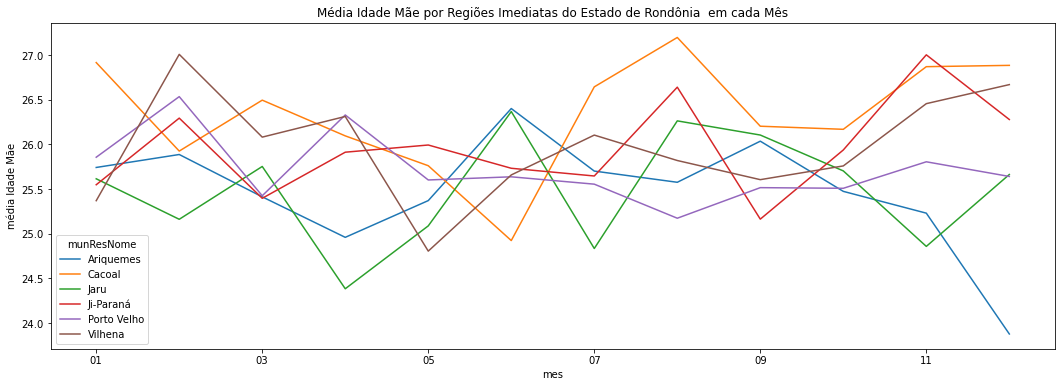

In [27]:
df_t.plot(figsize = [18,6],
          title = 'Média Idade Mãe por Regiões Imediatas do Estado de Rondônia  em cada Mês',
          ylabel = 'média Idade Mãe')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [28]:
df8 = df[['munResNome', 'IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT']]
df8.head()

,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
0,Alta Floresta D'Oeste,19,26.0,0.0,0.0
1,Alta Floresta D'Oeste,29,24.0,1.0,0.0
2,Alta Floresta D'Oeste,37,32.0,2.0,0.0
3,Alto Alegre dos Parecis,30,24.0,0.0,0.0
4,Alta Floresta D'Oeste,30,27.0,1.0,0.0


In [29]:
IDH={"Porto Velho":"IDH-M Alto",
"Ji-Paraná":"IDH-M Alto",
"Ariquemes":"IDH-M Alto",
"Vilhena":"IDH-M Alto",
"Cacoal":"IDH-M Alto",
"Rolim de Moura":"IDH-M Alto",
"Jaru": "IDH-M Médio",
"Guajará-Mirim": "IDH-M Médio",
"Ouro Preto do Oeste": "IDH-M Médio",
"Pimenta Bueno":"IDH-M Alto",
"Buritis": "IDH-M Médio",
"Machadinho D'Oeste": "IDH-M Baixo",
"Espigão D'Oeste": "IDH-M Médio",
"Nova Mamoré": "IDH-M Baixo",
"Alta Floresta D'Oeste": "IDH-M Médio",
"São Miguel do Guaporé": "IDH-M Médio",
"Candeias do Jamari": "IDH-M Médio",
"Presidente Médici": "IDH-M Médio",
"São Francisco do Guaporé": "IDH-M Médio",
"Nova Brasilândia D'Oeste": "IDH-M Médio",
"Cerejeiras": "IDH-M Médio",
"Costa Marques": "IDH-M Médio",
"Alto Paraíso": "IDH-M Médio",
"Colorado do Oeste": "IDH-M Médio",
"Alvorada D'Oeste": "IDH-M Médio",
"Cujubim" : "IDH-M Médio",
"Monte Negro": "IDH-M Médio",
"Urupá": "IDH-M Médio",
"Seringueiras": "IDH-M Baixo",
"Campo Novo de Rondônia": "IDH-M Baixo",
"Mirante da Serra": "IDH-M Médio",
"Chupinguaia": "IDH-M Médio",
"Alto Alegre dos Parecis": "IDH-M Baixo",
"Corumbiara": "IDH-M Médio",
"Governador Jorge Teixeira": "IDH-M Baixo",
"Itapuã do Oeste": "IDH-M Médio",
"Nova União": "IDH-M Baixo",
"Santa Luzia D'Oeste": "IDH-M Médio",
"Novo Horizonte do Oeste": "IDH-M Médio",
"Theobroma": "IDH-M Baixo",
"Vale do Anari": "IDH-M Baixo",
"Ministro Andreazza": "IDH-M Médio",
"Vale do Paraíso": "IDH-M Médio",
"Cabixi": "IDH-M Médio",
"Cacaulândia": "IDH-M Médio",
"Teixeirópolis": "IDH-M Médio",
"São Felipe D'Oeste": "IDH-M Médio",
"Rio Crespo": "IDH-M Médio",
"Parecis": "IDH-M Médio",
"Primavera de Rondônia": "IDH-M Médio",
"Pimenteiras do Oeste": "IDH-M Médio",
"Castanheiras": "IDH-M Médio"}

In [30]:
df8 = df8.set_index('munResNome')

In [31]:
df8.groupby(IDH).mean()

,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
munResNome,,,,
IDH-M Alto,26.280332,31.074091,1.033960,0.272297
IDH-M Baixo,25.326944,30.617450,1.072664,0.249406
IDH-M Médio,25.884855,31.207092,1.088847,0.258667


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [32]:
df8.head()

,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
munResNome,,,,
Alta Floresta D'Oeste,19,26.0,0.0,0.0
Alta Floresta D'Oeste,29,24.0,1.0,0.0
Alta Floresta D'Oeste,37,32.0,2.0,0.0
Alto Alegre dos Parecis,30,24.0,0.0,0.0
Alta Floresta D'Oeste,30,27.0,1.0,0.0


In [33]:
IFDM={"Porto Velho":"IFDM Moderado",
"Ji-Paraná":"IFDM Moderado",
"Ariquemes":"IFDM Moderado",
"Vilhena":"IFDM Moderado",
"Cacoal":"IFDM Moderado",
"Rolim de Moura":"IFDM Moderado",
"Jaru":"IFDM Moderado",
"Guajará-Mirim":"IFDM Regular",
"Ouro Preto do Oeste":"IFDM Moderado",
"Pimenta Bueno":"IFDM Moderado",
"Buritis":"IFDM Moderado",
"Machadinho D'Oeste":"IFDM Regular",
"Espigão D'Oeste":"IFDM Regular",
"Nova Mamoré":"IFDM Regular",
"Alta Floresta D'Oeste":"IFDM Moderado",
"São Miguel do Guaporé":"IFDM Moderado",
"Candeias do Jamari":"IFDM Moderado",
"Presidente Médici":"IFDM Moderado",
"São Francisco do Guaporé":"IFDM Moderado",
"Nova Brasilândia D'Oeste":"IFDM Regular",
"Cerejeiras":"IFDM Moderado",
"Costa Marques":"IFDM Regular",
"Alto Paraíso":"IFDM Regular",
"Colorado do Oeste":"IFDM Moderado",
"Alvorada D'Oeste":"IFDM Regular",
"Cujubim" :"IFDM Regular",
"Monte Negro":"IFDM Moderado",
"Urupá":"IFDM Moderado",
"Seringueiras":"IFDM Regular",
"Campo Novo de Rondônia":"IFDM Regular",
"Mirante da Serra":"IFDM Regular",
"Chupinguaia":"IFDM Moderado",
"Alto Alegre dos Parecis":"IFDM Regular",
"Corumbiara":"IFDM Regular",
"Governador Jorge Teixeira":"IFDM Regular",
"Itapuã do Oeste":"IFDM Regular",
"Nova União":"IFDM Regular",
"Santa Luzia D'Oeste":"IFDM Moderado",
"Novo Horizonte do Oeste":"IFDM Regular",
"Theobroma":"IFDM Regular",
"Vale do Anari":"IFDM Regular",
"Ministro Andreazza":"IFDM Regular",
"Vale do Paraíso":"IFDM Regular",
"Cabixi":"IFDM Regular",
"Cacaulândia":"IFDM Regular",
"Teixeirópolis":"IFDM Moderado",
"São Felipe D'Oeste":"IFDM Moderado",
"Rio Crespo":"IFDM Moderado",
"Parecis":"IFDM Regular",
"Primavera de Rondônia":"IFDM Moderado",
"Pimenteiras do Oeste":"IFDM Moderado",
"Castanheiras":"IFDM Regular"}

In [34]:
df8.groupby(IFDM).mean()

,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
munResNome,,,,
IFDM Moderado,26.223139,31.061687,1.027298,0.270330
IFDM Regular,25.535131,31.237509,1.164372,0.250616


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [35]:
PIB={"Porto Velho":"PIB - acima de 1 bilhão",
"Ji-Paraná":"PIB - acima de 1 bilhão",
"Ariquemes":"PIB - acima de 1 bilhão",
"Vilhena":"PIB - acima de 1 bilhão",
"Cacoal":"PIB - acima de 1 bilhão",
"Rolim de Moura":"PIB - acima de 1 bilhão",
"Jaru":"PIB - acima de 1 bilhão",
"Guajará-Mirim":"PIB - acima de 500 milhões",
"Ouro Preto do Oeste":"PIB - acima de 500 milhões",
"Pimenta Bueno":"PIB - acima de 1 bilhão",
"Buritis":"PIB - acima de 500 milhões",
"Machadinho D'Oeste":"PIB - acima de 500 milhões",
"Espigão D'Oeste":"PIB - acima de 500 milhões",
"Nova Mamoré":"PIB - acima de 500 milhões",
"Alta Floresta D'Oeste":"PIB - acima de 300 milhões",
"São Miguel do Guaporé":"PIB - acima de 500 milhões",
"Candeias do Jamari":"PIB - acima de 500 milhões",
"Presidente Médici":"PIB - acima de 300 milhões",
"São Francisco do Guaporé":"PIB - acima de 300 milhões",
"Nova Brasilândia D'Oeste":"PIB - acima de 300 milhões",
"Cerejeiras":"PIB - acima de 500 milhões",
"Costa Marques":"PIB - acima de 100 milhões",
"Alto Paraíso":"PIB - acima de 300 milhões",
"Colorado do Oeste":"PIB - acima de 300 milhões",
"Alvorada D'Oeste":"PIB - acima de 200 milhões",
"Cujubim" :"PIB - acima de 300 milhões",
"Monte Negro":"PIB - acima de 200 milhões",
"Urupá":"PIB - acima de 100 milhões",
"Seringueiras":"PIB - acima de 100 milhões",
"Campo Novo de Rondônia":"PIB - acima de 200 milhões",
"Mirante da Serra":"PIB - acima de 100 milhões",
"Chupinguaia":"PIB - acima de 100 milhões",
"Alto Alegre dos Parecis":"PIB - acima de 200 milhões",
"Corumbiara":"PIB - acima de 100 milhões",
"Governador Jorge Teixeira":"PIB - acima de 100 milhões",
"Itapuã do Oeste":"PIB - acima de 100 milhões",
"Nova União":"PIB - até 100 milhões",
"Santa Luzia D'Oeste":"PIB - acima de 100 milhões",
"Novo Horizonte do Oeste":"PIB - acima de 100 milhões",
"Theobroma":"PIB - acima de 100 milhões",
"Vale do Anari":"PIB - acima de 100 milhões",
"Ministro Andreazza":"PIB - acima de 100 milhões",
"Vale do Paraíso":"PIB - acima de 100 milhões",
"Cabixi":"PIB - acima de 100 milhões",
"Cacaulândia":"PIB - acima de 100 milhões",
"Teixeirópolis":"PIB - até 100 milhões",
"São Felipe D'Oeste":"PIB - até 100 milhões",
"Rio Crespo":"PIB - até 100 milhões",
"Parecis":"PIB - até 100 milhões",
"Primavera de Rondônia":"PIB - até 100 milhões",
"Pimenteiras do Oeste":"PIB - até 100 milhões",
"Castanheiras":"PIB - até 100 milhões"}

In [36]:
df8.groupby(PIB).mean()

,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
munResNome,,,,
PIB - acima de 1 bilhão,26.265562,31.108387,1.026435,0.270229
PIB - acima de 100 milhões,25.662910,31.602102,1.001561,0.237474
PIB - acima de 200 milhões,25.323204,30.386441,1.000000,0.238829
PIB - acima de 300 milhões,25.833511,30.183386,0.996774,0.233261
PIB - acima de 500 milhões,25.782528,31.322907,1.234191,0.297597
PIB - até 100 milhões,26.515081,31.585185,1.000000,0.162736


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

 **INSIGHTS:**
 A **Primeira Tabela** traz a média de idade da mãe e do pai, por faixa de latitudade dos Municípios, acima e menor de -10. Esta tabela apenas demonstra, que no Estado de Rondônia como todo, a média de idade das mãe é menor do que a idade média dos pais.
 A **Segunda Tabela** traz a média de quantidade de filhos vivos e mortos por faixa de municípios com área maior e menor a 3.000m². A média maior de quantidade de filhos mortos nos Municípios acima de 3.000m² não traz grande informação, na medida que este aumento é proporcional à maior média de casos de filhos vivos também nos municípios com área acima de 3.000m².
 A **Terceira Tabela** traz a média de APGAR 1 e APGAR5 por faixa de altitude dos municípios (até 100m, de 100 a 200m e acima de 200m). Contudo, não traz qualquer informação adicional.
 O **gráfico da média da mãe por Regiões Imediatas do Estado de Rondônia no transcorrer do tempo** demonstra que, no ano de 2019, foi a Região Imediata de Cacoal que teve a maior média de idade das mães no mês de Agosto, enquanto de a menor média de idade das mães ocorreu na Região Imediata de Ariquemes no mês de Dezembro.
 A **Tabela de IDH** demonstra que a maior média de idade da mãe ocorreu nos municípios com o IDH- Alto.
 A **Tabela de IFDM** também demonstra que a maior média de idade da mãe ocorreu nos municípios com IFDM Moderado (melhor índice IFDM do municípios do Estado de Rondônia).
 A **Tabela do PIB** demonstra que a maior média de idade da mãe se deu nos municípios com melhor PIB (acima de 1 bilhão) e com o pior PIB (até 100 milhões).
 Diante disso, concluir-se que o aumento da idade média das mãe pode está relacionado com a melhor situação do município, levando muitas vezes a mulher a dar prevalência a outras questões antes de constituir uma família. O fato da média de idade da mãe também ser mais alto nos municípios com PIB até 100 milhões deve ser melhor estudado, pois pode representar casos onde não há um planejamento familiar, onde se encontram famílias com muitos filhos, muito embora o índice de quantidade de filhos vivos se mantém na média em relação com outras faixas de análise da tabela.  